
# HW5-1-1 Features of Text

## 2021년 11월 07일 안상호

**Text classification**: a way to categorize documents or pieces of text. By examining the word usage in a piece of text, classifiers can decide what class label to assign to it.
<br>A binary classifier decides between two labels, such as positive or negative.
<br>**Multi-label classifier** can assign one or more labels to a piece of text.
<br>Classification works by learning from **labeled feature sets**.
<br>A **feature set** is basically a key-value mapping of feature names to feature values. 
<br>In the case of text classification, the feature names are usually words, and the values are all True. 
<br>As the documents may have unknown words, and the number of possible words may be very large, words that don't occur in the text are omitted, instead of including them in a feature set with the value False.

## Bag of words feature extraction
Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. 
<br>The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict. 
<br>The **bag of words** model is the simplest method; it constructs a word presence feature set from all the words of an instance. 
<br>This method doesn't care about the order of the words, or how many times a word occurs, all that
matters is whether the word is present in a list of words.

In [1]:
# 주어진 문서(word tokenize된 결과)에 대해 feature set을 dictionary 형태로 구성해서 반환
def bag_of_words(words):
    return dict([(word, True) for word in words]) #있는 단어들에 대해 True로 표시, 없는 단어는 표시 안 함

In [2]:
bag_of_words(['the', 'quick', 'brown', 'fox'])

{'the': True, 'quick': True, 'brown': True, 'fox': True}

## NLTK Corpus
https://www.nltk.org/book/ch02.html
### movie_reviews
NLTK Corpus 중 movie review 수집 데이터로, 감성분석 결과(pos, neg)가 label로 붙어 있음<br>
Compiler: Pang, Lee<br>
Contents: 2k movie reviews with sentiment polarity classification

In [3]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print(movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print(movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('id:', fileid)
print(movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print(movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print(movie_reviews.words(fileid)[:10]) #첫번째 문서를 word tokenize한 결과 중 앞 열 단어

review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
['

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ash11\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


#### bag of words model을 이용한 feature 추출 첫번째 방법
label 별로 각 문서들에 대한 feature를 생성 - bag_of_words() 함수를 이용

collections(https://docs.python.org/2/library/collections.html) - High-performance container datatypes - 를 이용하여 feature set을 저장. 하나의 label(ex. 'neg')에 1,000개의 feature set을 할당해야 하므로 단순 dictionary가 아닌 container를 사용. 각 feature는 dictionary로 이루어져 있음

In [4]:
import collections

#feature 추출을 위한 함수로, 앞서 정의한 bag_of_words()를 사용
def label_feats_from_corpus(corp, feature_detector=bag_of_words): 
    label_feats = collections.defaultdict(list) # container 초기화
    for label in corp.categories(): #''neg', 'pos' 각 label에 대해
        for fileid in corp.fileids(categories=[label]): #각 label에 해당하는 문서들에 대해
            feats = feature_detector(corp.words(fileids=[fileid])) #주어진 문서를 bag_of_words feature로 변환
            label_feats[label].append(feats) #container에 feature 추가
    return label_feats

lfeats = label_feats_from_corpus(movie_reviews)
print(lfeats.keys())

dict_keys(['neg', 'pos'])


In [5]:
len(lfeats['neg'])

1000

In [6]:
", ".join(lfeats['neg'][0])

'plot, :, two, teen, couples, go, to, a, church, party, ,, drink, and, then, drive, ., they, get, into, an, accident, one, of, the, guys, dies, but, his, girlfriend, continues, see, him, in, her, life, has, nightmares, what, \', s, deal, ?, watch, movie, ", sorta, find, out, critique, mind, -, fuck, for, generation, that, touches, on, very, cool, idea, presents, it, bad, package, which, is, makes, this, review, even, harder, write, since, i, generally, applaud, films, attempt, break, mold, mess, with, your, head, such, (, lost, highway, &, memento, ), there, are, good, ways, making, all, types, these, folks, just, didn, t, snag, correctly, seem, have, taken, pretty, neat, concept, executed, terribly, so, problems, well, its, main, problem, simply, too, jumbled, starts, off, normal, downshifts, fantasy, world, you, as, audience, member, no, going, dreams, characters, coming, back, from, dead, others, who, look, like, strange, apparitions, disappearances, looooot, chase, scenes, tons, we

In [7]:
lfeats['neg'][0]

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

#### bag of words model을 이용한 feature 추출 두번째 방법
1. 각 문서를 먼저 word list와 label의 list로 변환<br>
2. feature 추출 대상이 되는 단어 집합 구성 - 이 때 전체 words들에 대한 frequency data를 이용해 상위 n개의 단어만으로 feature 구성이 가능
3. 각 문서에 대해 feature 추출 대상 단어들을 대상으로 해당 단어가 문서에 있는 지의 여부를 dictionary로 생성
4. 생성된 feature와 label로 문서들에 대한 feature set을 구성

In [8]:
from nltk.corpus import movie_reviews
import random
# category 별로 fileid를 추출하고, 해당 fileid에 대해 문서의 word tokenize된 결과를 가져와서 
# documents 집합을 구성
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [9]:
#nltk FreqDist 함수를 이용하여 단어별로 빈도 수를 계산
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [10]:
for word in list(all_words)[:10]:
    print(word, all_words[word])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822


In [11]:
sorted_features = sorted(all_words, key=all_words.get, reverse=True)
for word in sorted_features[:10]:
    print(word, all_words[word])
print(sorted_features[:10])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']


In [12]:
word_features = sorted_features[:2000] #빈도가 높은 상위 2000개의 단어만 추출하여 features를 구성

print(word_features[:100])

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [13]:
#주어진 document를 feature로 변환하는 함수, word_features를 사용
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words) #2000개의 단어에 대해 True, False로 입력
    return features

In [14]:
#위에서 만든 documents 집합에 대해 feature set을 생성
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

In [15]:
print(len(featuresets[0][0])) #첫째 feature set의 첫째 element 즉 bag_of_words feature의 수 - 상위 2000개 단어
print(featuresets[0][1]) #첫째 feature set의 둘째 element 즉 label
print(featuresets[0][0]) # 첫째 feature set의 내용


2000
pos
{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': True, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': True, 'this': True, 'film': True, 'i': True, 'he': True, 'but': True, 'on': True, 'are': True, 't': True, 'by': True, 'be': True, 'one': True, 'movie': True, 'an': True, 'who': True, 'not': True, 'you': True, 'from': True, 'at': True, 'was': True, 'have': True, 'they': True, 'has': True, 'her': True, 'all': True, '?': True, 'there': True, 'like': True, 'so': True, 'out': True, 'about': False, 'up': True, 'more': True, 'what': True, 'when': True, 'which': True, 'or': False, 'she': True, 'their': False, ':': False, 'some': True, 'just': True, 'can': True, 'if': True, 'we': True, 'him': True, 'into': True, 'even': True, 'only': True, 'than': False, 'no': False, 'good': True, 'time': True, 'most': True, 'its': True, 'will': True, 'story': 

### BOW feature set을 이용한 분류 맛보기

https://www.nltk.org/book/ch06.html Section 1.3

![alt text](https://www.nltk.org/images/supervised-classification.png "classifier")

NLTK Naive Bayes 분류기를 사용
http://www.nltk.org/howto/classify.html <br>
주어진 문서의 label이 'neg'인지, 'pos'인지를 판단하는 분류기를 학습 <br>
상세한 내용은 **Text Classification**에서!

In [16]:
train_set, test_set = featuresets[100:], featuresets[:100] #train set과 test set으로 분리

classifier = nltk.NaiveBayesClassifier.train(train_set) # train set으로 학습
print(nltk.classify.accuracy(classifier, test_set)) # test set으로 분류기 성능을 평가
classifier.show_most_informative_features(5) #분류기에서 가장 중요한 영향을 미치는 단어 상위 5개

0.76
Most Informative Features
             outstanding = True              pos : neg    =     11.2 : 1.0
                   mulan = True              pos : neg    =      9.0 : 1.0
                  seagal = True              neg : pos    =      8.2 : 1.0
                   damon = True              pos : neg    =      7.9 : 1.0
             wonderfully = True              pos : neg    =      6.7 : 1.0


In [17]:
testfeat = bag_of_words(['the', 'actor', 'was', 'seagal']) 
print(classifier.classify(testfeat))
testfeat = bag_of_words(['the', 'story', 'was', 'outstanding'])
print(classifier.classify(testfeat))
negfeat = bag_of_words(['the', 'plot', 'was', 'ludicrous']) # 터무니없는
print(classifier.classify(negfeat))
posfeat = bag_of_words(['kate', 'winslet', 'is', 'accessible']) # 이해가 돼!
print(classifier.classify(posfeat))

neg
pos
neg
pos


## Count Vector with Scikit
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [18]:
# data 준비, 입력이 raw text임
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(vocabulary=word_features) #빈도수 상위 2,000개의 단어만 사용하여 count vector 객체를 생성
print(cv) #객체 parameter들을 확인

CountVectorizer(vocabulary=[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is',
                            'in', 's', '"', 'it', 'that', '-', ')', '(', 'as',
                            'with', 'for', 'his', 'this', 'film', 'i', 'he',
                            'but', 'on', 'are', 't', 'by', ...])


In [20]:
print('reviews count:', len(reviews))

reviews count: 2000


In [21]:
X = cv.fit_transform(reviews) #review를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names()[:100]) # count vector에 사용된 feature 이름을 반환

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(X[0].toarray()[0, :100]) #변환된 결과의 첫째 feature set 중에서 앞 100개를 출력
print(max(X[0].toarray()[0])) #변환된 결과의 첫째 feature set 중에서 max 값

[ 0 38  0  0 20 16 16  0 12  8  0  0 25 13  0  0  0  1  5  4  1 10  6  0
  1 10  4 13  0  2  1  3  6  3  3  3  3  4  0  0  2  5  3  4  6  0 10  3
  3  3  2  2  2  4  1  4  2  0  0  0  0  4  0  0  4  1  5  3  1  0  1  2
  0  4  4  0  0  1  2  0  2  1  3  0  2  2  1  0  2  1  0  0  0  2  2  0
  3  2  5  1]
38


In [23]:
for word, count in zip(cv.get_feature_names()[:20], X[0].toarray()[0, :20]):
    print(word, ':', count)

, : 0
the : 38
. : 0
a : 0
and : 20
of : 16
to : 16
' : 0
is : 12
in : 8
s : 0
" : 0
it : 25
that : 13
- : 0
) : 0
( : 0
as : 1
with : 5
for : 4


## 문서 간 유사도 계산 및 가장 유사한 문서 검색
### Cosine similarity
(Wikipedia) a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.
![alt text](https://hsto.org/files/f73/289/979/f732899792f246358649e89765cd88da.png "cos")

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

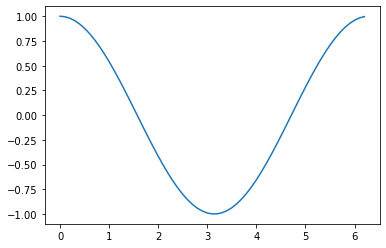

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

new_review = "first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation. they are small pokemon with a powerful punch and have great psychic abilities"
new_vec = cv.transform([new_review]) #문서를 count vector로 변환

sim_result = cosine_similarity(new_vec, X) #변환된 count vector와 기존 값들과의 similarity 계산

In [26]:
# https://docs.python.org/3/howto/sorting.html
print(sorted(sim_result[0], reverse=True)[:10])

[0.47404152357849716, 0.4354705693078365, 0.4179484687443539, 0.40669013197195214, 0.4042441311205991, 0.4031257527594671, 0.39316730570210306, 0.38744458895341755, 0.3852303002224743, 0.384468719848977]


In [27]:
import numpy as np
np.argmax(sim_result[0])

679

In [28]:
print(reviews[679])

 " pokemon 3 : the movie " has a lot of bad things in it . 
first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation . 
the first film came out the end of 1999 and was a huge hit grossing almost $90 million domestically . 
a sequel soon followed and even made $45 million . 
warner has released their third movie based on the immensely popular video game and tv series and its a waste of time and celluloid . 
this time ash ketchum and his friends are on their way to the johto battles ( which my little brother told me the new spinoff is " pokemon : the johto journeys " so go figure ) anyway he comes in contact with a young girl who's father has disappeared after trying to discover the unown . 
they are small pokemon with a powerful punch and have great psychic abilities . 
the unown bring together their psychic abilities and create entei a powerful legendary pokemon who barriers young molly's house and creates every wish she wants . 
now

In [29]:
(-sim_result[0]).argsort()[:10]

array([ 679,  176, 1152, 1575,  952,  470,  688, 1144,  103,  159],
      dtype=int64)

## TFIDF with Scikit
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
![alt text](images/tfidf.png)
![alt text](images/idf.png)

기존에 만든 count vector로부터 TFIDF vector로 변환<br>
Count vector를 거치지 않고 처음부터 TFIDF vector를 생성하는 것도 가능함 -> 나중에

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True)
transformer

TfidfTransformer()

In [31]:
X_tfidf = transformer.fit_transform(X)
print(X_tfidf.shape)
print('max count score of the first vector:', max(X[0].toarray()[0]))
print('max tfidf score of the first vector:', max(X_tfidf[0].toarray()[0]))

(2000, 2000)
max count score of the first vector: 38
max tfidf score of the first vector: 0.3958279594831942


In [32]:
new_tfidf = transformer.transform(new_vec)
sim_result_tf = cosine_similarity(new_tfidf, X_tfidf)
np.argmax(sim_result_tf[0])

679

In [33]:
print(sorted(sim_result_tf[0], reverse=True)[:10])

[0.39386919931415737, 0.2158533727955655, 0.2055888622850777, 0.18940610744482467, 0.18862790397285573, 0.18841943811025338, 0.18329868368380425, 0.1810784645715442, 0.17853711709135542, 0.17620991687411133]


In [34]:
#count vector에 대한 유사도 상위 문서와 tfidf에 대한 유사도 상위 문서를 비교
print('Count vector:', (-sim_result[0]).argsort()[:10])
print('TFIDF vector:', (-sim_result_tf[0]).argsort()[:10])

Count vector: [ 679  176 1152 1575  952  470  688 1144  103  159]
TFIDF vector: [ 679  577 1209 1933  672 1280    3  913 1596 1163]


### Jaccard Similarity
https://en.wikipedia.org/wiki/Jaccard_index

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)

In [42]:
# new_vec.toarray()[0]
X[i].toarray()[0]

array([ 0, 21,  0, ...,  0,  0,  1], dtype=int64)

In [46]:
from sklearn.metrics import jaccard_score #jaccard_similarity_score
tfidf_list = [679, 1280,  577, 1933, 1209, 1115, 1274, 913, 1456, 1796]
for i in tfidf_list:
    print(jaccard_score(new_vec.toarray()[0], X[i].toarray()[0], average=None))

[0.93012658 0.096      0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.96686747 0.046875   0.         0.         0.         0.        ]
[0.91893253 0.01612903 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.85850957 0.01395349 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.93872426 0.03809524 0.         0.         0.         0.
 0.         0.         0.        ]
[0.81410579 0.0077821  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.81410579 0.0077821  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

### Dimension을 줄이는 방법: SVD
lasso가 feature selection이라면, SVD는 feature extraction

**Feature selection** (https://en.wikipedia.org/wiki/Feature_selection) 

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

Text mining에서는 단어의 수를 다양한 방법으로 줄일 수 있음

* 전처리 과정에서 의미 없는 단어 삭제
* stopwords 삭제
* 빈도가 낮은 단어 삭제
* 빈도가 높은 단어 삭제
* 결과에 영향을 미치지 않는 단어 삭제

**Feature extraction**: (https://en.wikipedia.org/wiki/Feature_extraction)

In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

* PCA(Principal component analysis)
* LSA(Latent semantic analysis)
* SVD(Singular-value decomposition)

In [47]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_tfidf)  

print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
print(svd.singular_values_)  

newX = svd.transform(X_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)

[0.01514489 0.0166241  0.01317354 0.01030468 0.00756888 0.00725983
 0.00659312 0.00580567 0.00550706 0.00504246 0.00483872 0.00470389
 0.00453713 0.0043536  0.00431135 0.00416    0.004104   0.00402205
 0.00382989 0.00380755 0.00368831 0.00367411 0.00363125 0.00352177
 0.00347462 0.00339477 0.00335058 0.00325921 0.00323821 0.00315392
 0.00314681 0.00304938 0.00300364 0.00299879 0.00295163 0.00292715
 0.00289516 0.00287941 0.00282832 0.00280253 0.00277811 0.00274297
 0.00271389 0.00269046 0.00265622 0.00264586 0.0026     0.00257771
 0.002563   0.00254529 0.00249945 0.00245759 0.00243905 0.00241787
 0.00238854 0.00235457 0.00234804 0.00233419 0.00229956 0.00229793
 0.00227727 0.00226871 0.00224831 0.0022351  0.00221655 0.00220348
 0.00219362 0.00218917 0.00217042 0.00216478 0.00215919 0.00212351
 0.00211488 0.00208353 0.00207419 0.00206522 0.00206176 0.00203532
 0.00202833 0.00200529 0.00200306 0.00199743 0.00197772 0.00196848
 0.00196284 0.0019419  0.00192315 0.00191866 0.00190419 0.0018

In [48]:
print(svd.components_.shape)
print(newX.shape)

(100, 2000)
(2000, 100)


In [49]:
svd.components_[0]

array([ 4.76279963e-29,  6.30071943e-01, -1.02820837e-31, ...,
        2.65980872e-03,  2.57052959e-03,  2.46302852e-03])